In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Carregamento do dataset do Melbourne Housing

In [2]:
# carrega o dataset csv do Melboune Housing em um dataframe pandas
dataset = pd.read_csv('./data/Melbourne_housing_FULL.csv')


In [3]:
# Apresenta o cabecalho do dataset e 5 linhas de dados
print(dataset.head())

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             R

In [4]:
# Apresenta os tipos de dados presentes no dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
# apresentação de dados estatístisticos dos atributos numéricos
dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [6]:
# verificação de dados faltantes
dataset.isnull().sum().sort_values(ascending=False)

BuildingArea     21115
YearBuilt        19306
Landsize         11810
Car               8728
Bathroom          8226
Bedroom2          8217
Lattitude         7976
Longtitude        7976
Price             7610
Regionname           3
CouncilArea          3
Propertycount        3
Distance             1
Postcode             1
Rooms                0
Address              0
Suburb               0
Type                 0
SellerG              0
Date                 0
Method               0
dtype: int64

In [7]:
# Apresenta a porcentagem de falta de dados
data_loss = (dataset.isna().mean()*100).round(2)
data_loss

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            21.83
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2         23.57
Bathroom         23.60
Car              25.04
Landsize         33.88
BuildingArea     60.58
YearBuilt        55.39
CouncilArea       0.01
Lattitude        22.88
Longtitude       22.88
Regionname        0.01
Propertycount     0.01
dtype: float64

In [8]:
# Converte dados para inteiros
colAdj = ['YearBuilt', 'Bathroom', 'Postcode', 'Bedroom2', 'Car', 'Propertycount']
dataset[colAdj] = dataset[colAdj].astype('Int64', errors='ignore')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  Int64  
 10  Bedroom2       26640 non-null  Int64  
 11  Bathroom       26631 non-null  Int64  
 12  Car            26129 non-null  Int64  
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  Int64  
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [9]:
# Classifica dados para valores proximos dos reais
dataset = dataset[dataset['YearBuilt'] >= 1850]
dataset = dataset[dataset['BuildingArea'] >= 1]
dataset = dataset[dataset['Landsize'] >= 1]

# Preencher valores ausentes com a média para variáveis numéricas
dataset['Price'].fillna(dataset['Price'].mean(), inplace=True)

C:\Users\Matheus\AppData\Local\Temp\ipykernel_14112\3517222753.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Price'].fillna(dataset['Price'].mean(), inplace=True)


In [10]:
# verificação de dados faltantes
dataset.isnull().sum().sort_values(ascending=False)

Car              173
Longtitude         7
Lattitude          7
Address            0
Suburb             0
Price              0
Type               0
Rooms              0
Method             0
Distance           0
Postcode           0
Date               0
SellerG            0
Bathroom           0
Bedroom2           0
Landsize           0
BuildingArea       0
CouncilArea        0
YearBuilt          0
Regionname         0
Propertycount      0
dtype: int64

In [11]:
# Convertendo a data para DD/MM/AAAA
dataset['Date'] = pd.to_datetime(dataset['Date'], format="%d/%m/%Y")
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset ['Date'].dt.year

In [12]:
print("Colunas disponíveis:", dataset.columns)

Colunas disponíveis: Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Month', 'Year'],
      dtype='object')


In [13]:

# Encontrar o primeiro e o último registro
first_month = dataset['Month'].min()
first_year = dataset[dataset['Month'] == first_month]['Year'].min()

last_month = dataset['Month'].max()
last_year = dataset[dataset['Month'] == last_month]['Year'].max()

# Exibir resultados
print(f'Primeiro mês com registro: {first_month}/{first_year}')
print(f'Último mês com registro: {last_month}/{last_year}')

Primeiro mês com registro: 1/2016
Último mês com registro: 12/2017


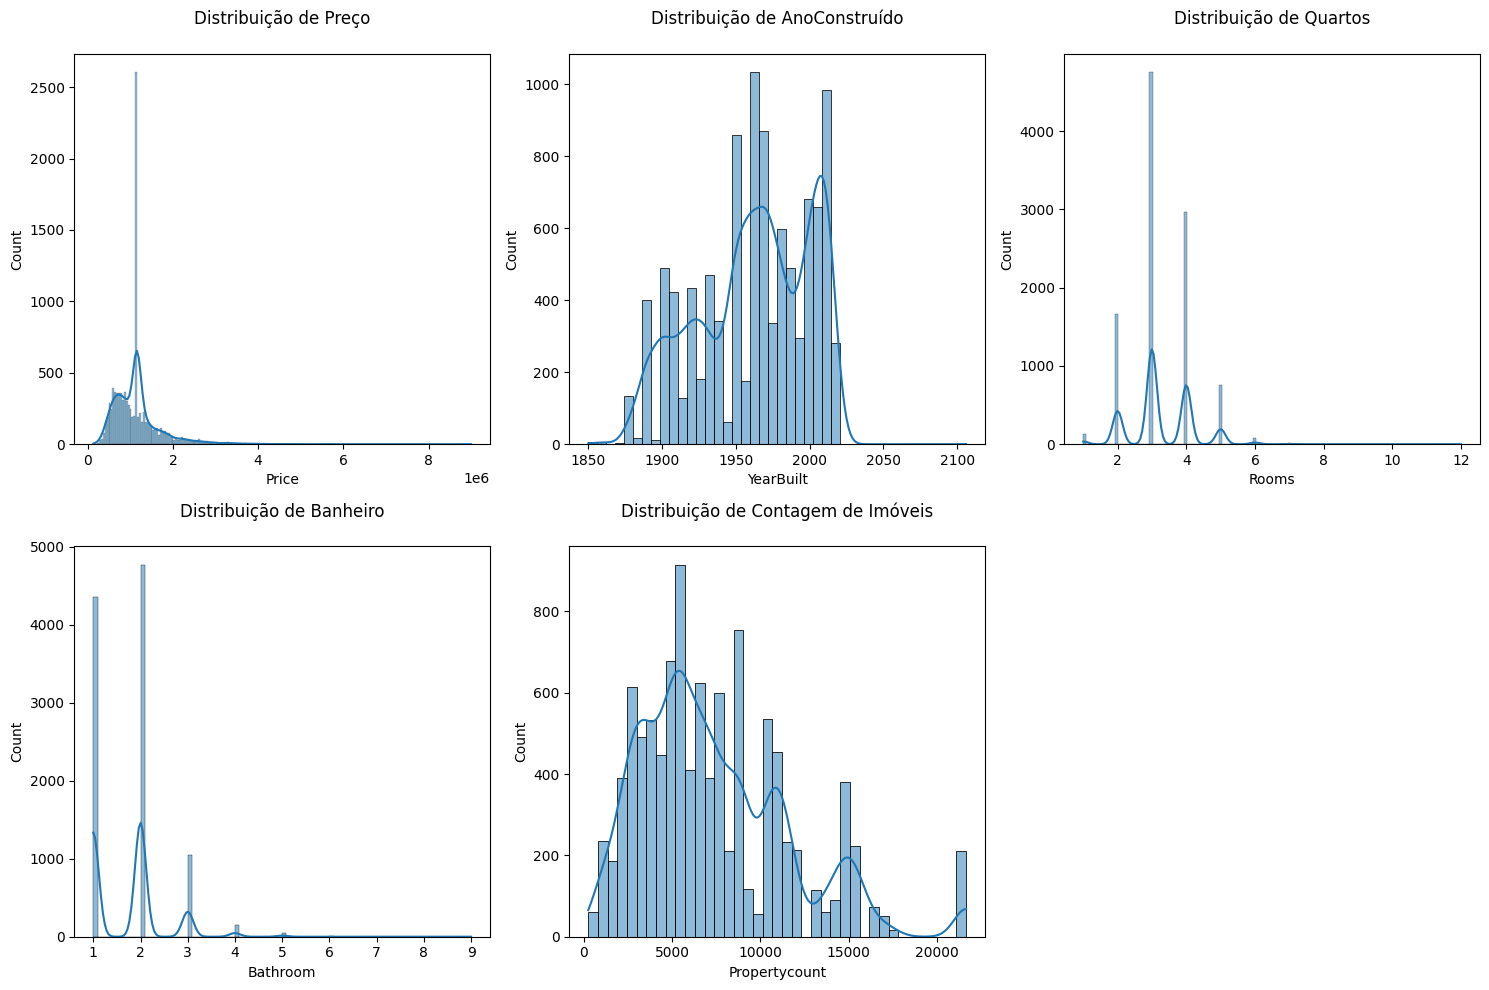

In [14]:
def hisPlot(df, columns):
  nRows = (len(columns) + 2) // 3
  plt.figure(figsize=(15, nRows*5))

  for i, column in enumerate(columns, 1):
    plt.subplot(nRows, 3, i)
    sns.histplot(df[column], kde=True)
    if column == 'Price':
      column = 'Preço'
    elif column == 'YearBuilt':
        column = 'AnoConstruído'
    elif column == 'Rooms':
        column = 'Quartos'
    elif column == 'Bathroom':
        column = 'Banheiro'
    elif column == 'Propertycount':
        column = 'Contagem de Imóveis'

    plt.title(f'Distribuição de {column}\n')

  plt.tight_layout()
  plt.show()

col = ['Price', 'YearBuilt', 'Rooms', 'Bathroom', 'Propertycount']
hisPlot(dataset, col)

In [15]:
#typeCount = dataset['Type'].value_counts(ascending = False)
#sns.barplot(x = typeCount.index, y = typeCount.values, palette = 'pastel',hue = typeCount )

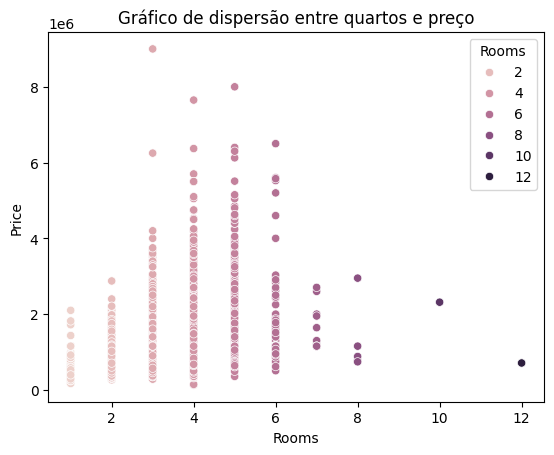

In [16]:
sns.scatterplot(x='Rooms', y='Price', data=dataset, hue='Rooms')
plt.title('Gráfico de dispersão entre quartos e preço')
plt.show()

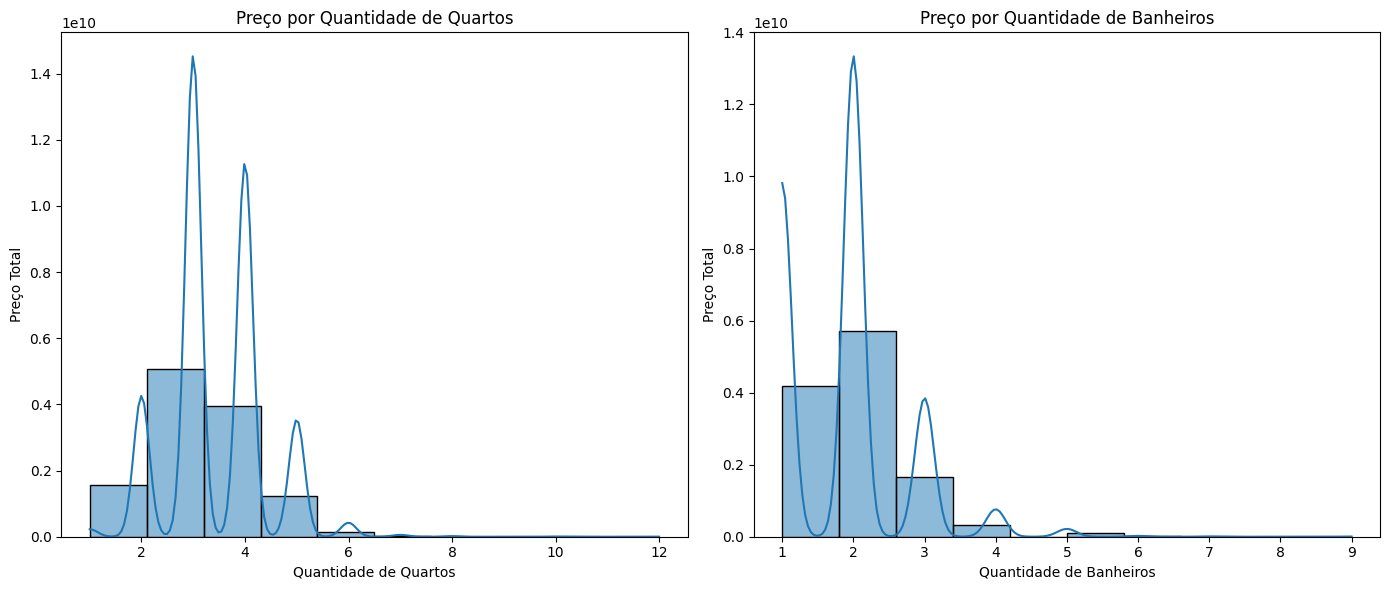

In [17]:
# Configurar a visualização
plt.figure(figsize=(14, 6))

# Gráfico de Preço vs. Quantidade de Quartos
plt.subplot(1, 2, 1)
sns.histplot(data=dataset, x='Rooms', weights='Price', bins=10, kde=True)
plt.title('Preço por Quantidade de Quartos')
plt.xlabel('Quantidade de Quartos')
plt.ylabel('Preço Total')

# Gráfico de Preço vs. Quantidade de Banheiros
plt.subplot(1, 2, 2)
sns.histplot(data=dataset, x='Bathroom', weights='Price', bins=10, kde=True)
plt.title('Preço por Quantidade de Banheiros')
plt.xlabel('Quantidade de Banheiros')
plt.ylabel('Preço Total')

# Mostrar os gráficos
plt.tight_layout()
plt.show()

In [18]:
dataset['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Northern Victoria',
       'Eastern Victoria', 'Western Victoria'], dtype=object)

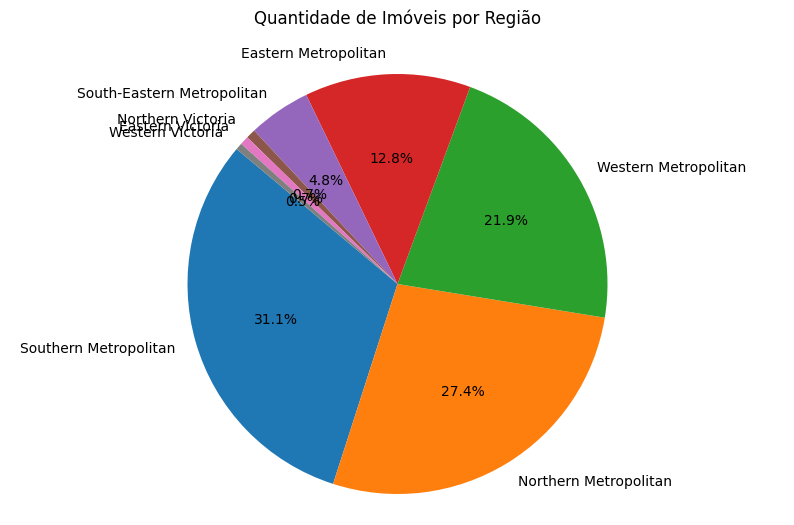

In [19]:
# Contar a quantidade de imóveis por Regionname
region_counts = dataset['Regionname'].value_counts()

# Criar gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Quantidade de Imóveis por Região\n')
plt.axis('equal')  # Igualar o eixo para um círculo perfeito
plt.show()


In [20]:
dataset['Month'].value_counts()


Month
5     1126
7     1105
9     1086
10    1066
11    1049
6     1019
3      927
8      886
2      865
12     574
4      495
1      175
Name: count, dtype: int64

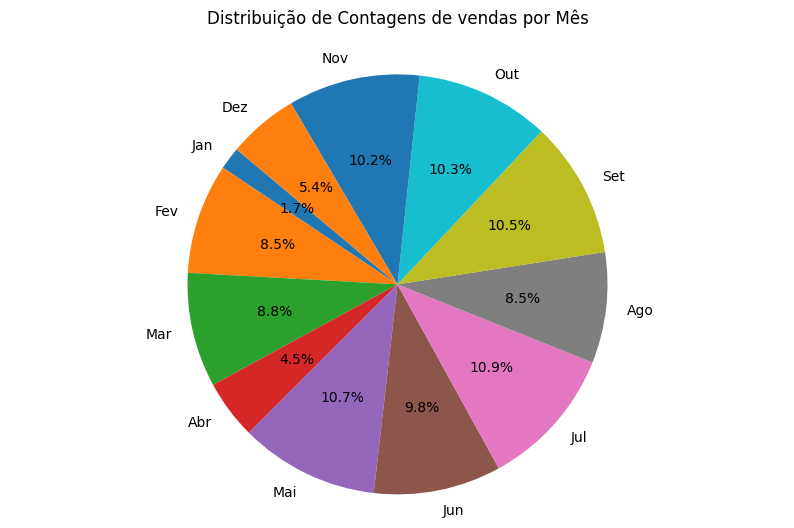

In [21]:
# Dados
months = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
counts = [169, 828, 859, 442, 1044, 956, 1064, 831, 1025, 1006, 989, 528]

# Criar gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=months, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Contagens de vendas por Mês\n')
plt.axis('equal')  # Igualar o eixo para um círculo perfeito
plt.show()

In [22]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,2016-02-04,2.5,3067,...,156.0,79.0,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019,2,2016
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,2017-03-04,2.5,3067,...,134.0,150.0,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019,3,2017
6,Abbotsford,55a Park St,4,h,1.600000e+06,VB,Nelson,2016-06-04,2.5,3067,...,120.0,142.0,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019,6,2016
7,Abbotsford,16 Maugie St,4,h,1.154702e+06,SN,Nelson,2016-08-06,2.5,3067,...,400.0,220.0,2006,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019,8,2016
11,Abbotsford,124 Yarra St,3,h,1.876000e+06,S,Nelson,2016-05-07,2.5,3067,...,245.0,210.0,1910,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019,5,2016


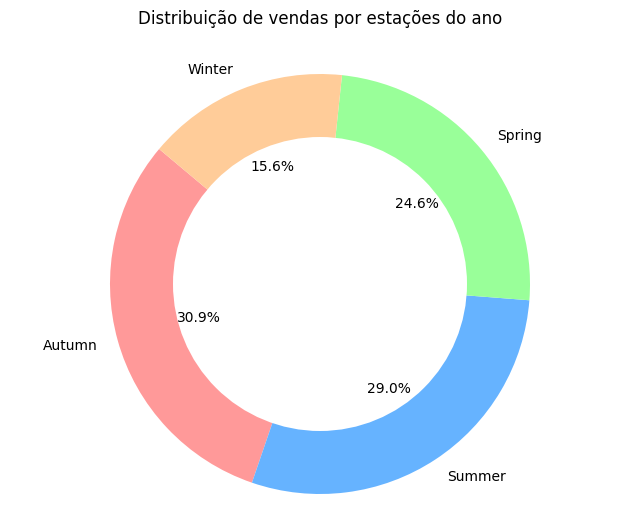

In [23]:
def getSeason(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

dataset['Season'] = dataset['Date'].dt.month.apply(getSeason)
dataset['Season'].unique()
dataset['Season'].value_counts(ascending=False)
sizes = dataset['Season'].value_counts().tolist()
labels = dataset['Season'].value_counts().index.tolist()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.title('Distribuição de vendas por estações do ano\n')

plt.show()

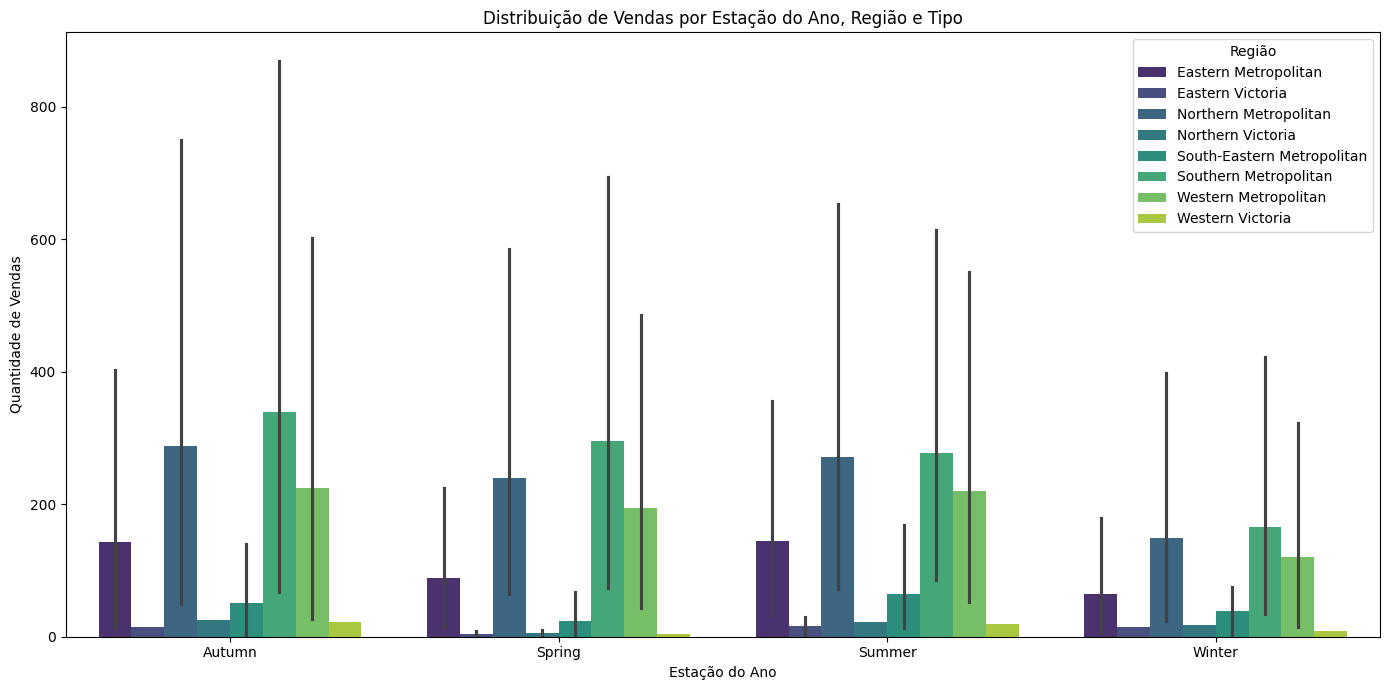

In [24]:
# Agrupar dados por estação, região e tipo, contando as vendas
sales_distribution = dataset.groupby(['Season', 'Regionname', 'Type']).size().reset_index(name='Sales')

# Criar gráfico
plt.figure(figsize=(14, 7))
sns.barplot(x='Season', y='Sales', hue='Regionname', data=sales_distribution, palette='viridis')
plt.title('Distribuição de Vendas por Estação do Ano, Região e Tipo')
plt.xlabel('Estação do Ano')
plt.ylabel('Quantidade de Vendas')
plt.legend(title='Região')
plt.tight_layout()
plt.show()

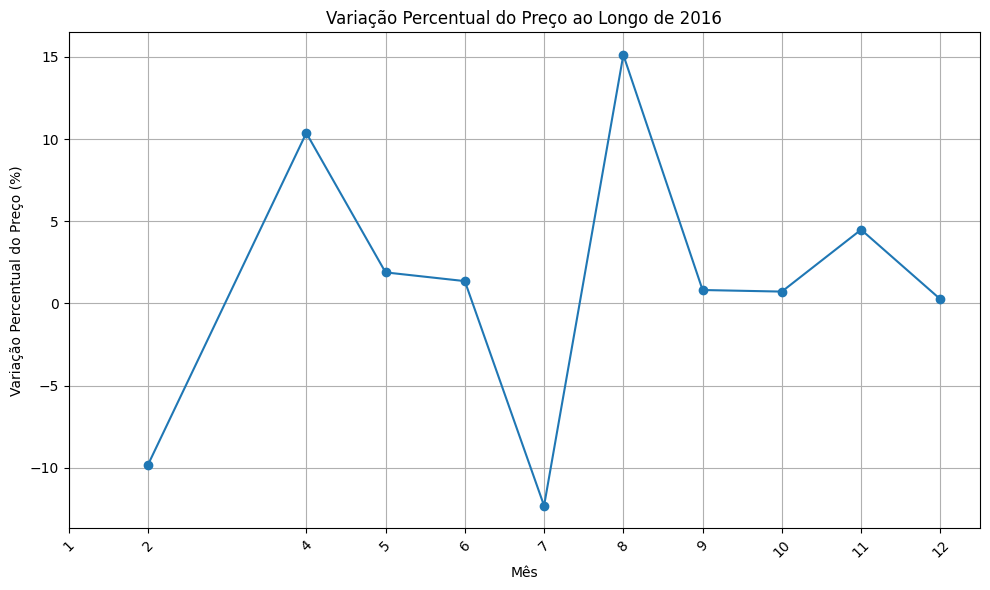

In [25]:
# Filtrar dados para o ano de 2016
data_2016 = dataset[dataset['Year'] == 2016]

# Calcular a média de preços por mês
monthly_avg_price_2016 = data_2016.groupby('Month')['Price'].mean().reset_index()

# Calcular a variação percentual
monthly_avg_price_2016['Price Variation (%)'] = monthly_avg_price_2016['Price'].pct_change() * 100

# Criar gráfico
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_price_2016['Month'], monthly_avg_price_2016['Price Variation (%)'], marker='o')
plt.title('Variação Percentual do Preço ao Longo de 2016')
plt.xlabel('Mês')
plt.ylabel('Variação Percentual do Preço (%)')
plt.xticks(monthly_avg_price_2016['Month'], rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


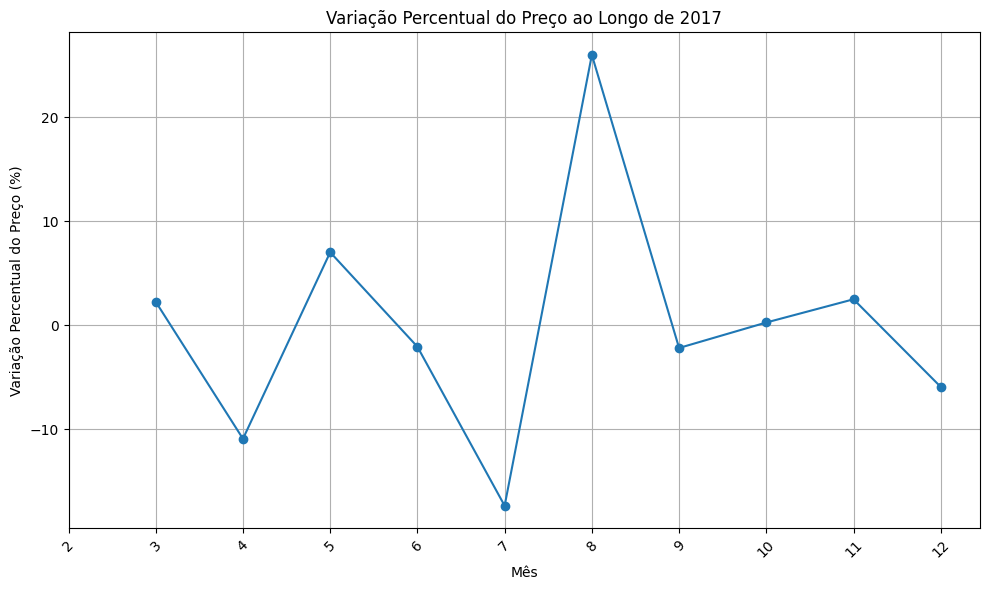

In [26]:
# Filtrar dados para o ano de 2017
data_2017 = dataset[dataset['Year'] == 2017]

# Calcular a média de preços por mês
monthly_avg_price_2017 = data_2017.groupby('Month')['Price'].mean().reset_index()

# Calcular a variação percentual
monthly_avg_price_2017['Price Variation (%)'] = monthly_avg_price_2017['Price'].pct_change() * 100

# Criar gráfico
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_price_2017['Month'], monthly_avg_price_2017['Price Variation (%)'], marker='o')
plt.title('Variação Percentual do Preço ao Longo de 2017')
plt.xlabel('Mês')
plt.ylabel('Variação Percentual do Preço (%)')
plt.xticks(monthly_avg_price_2017['Month'], rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


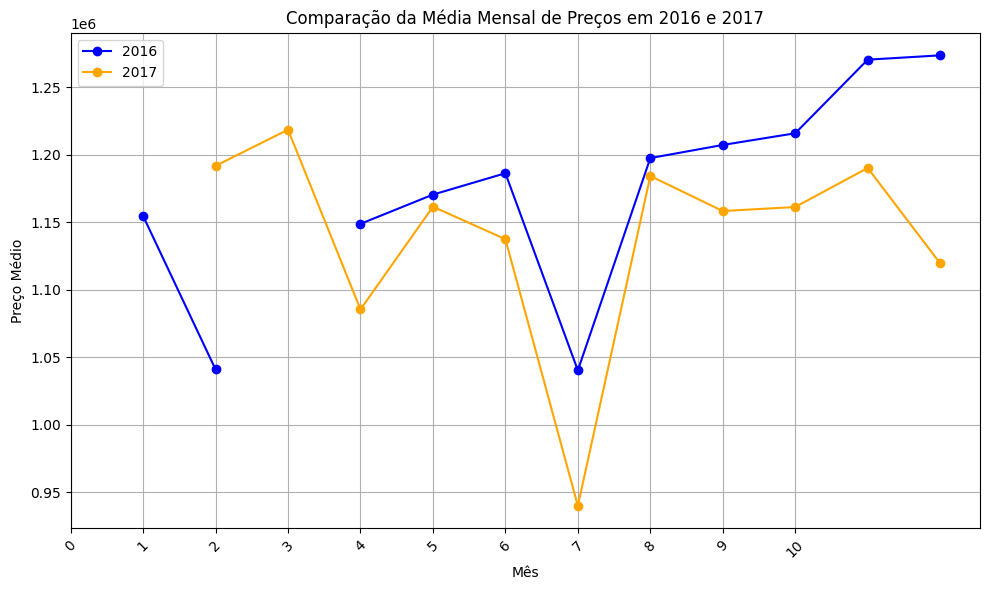

In [27]:
# Filtrar dados para os anos de 2016 e 2017
data_filtered = dataset[dataset['Year'].isin([2016, 2017])]

# Calcular a média de preços por mês e ano
monthly_avg_price = data_filtered.groupby(['Year', 'Month'])['Price'].mean().reset_index()

# Pivotar a tabela para facilitar o gráfico
pivoted = monthly_avg_price.pivot(index='Month', columns='Year', values='Price')
# Criar gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(pivoted.index, pivoted[2016], marker='o', label='2016', color='blue')
plt.plot(pivoted.index, pivoted[2017], marker='o', label='2017', color='orange')

# Adicionar título e rótulos
plt.title('Comparação da Média Mensal de Preços em 2016 e 2017')
plt.xlabel('Mês')
plt.ylabel('Preço Médio')
plt.xticks(monthly_avg_price_2016.index, monthly_avg_price_2017.index.astype(str), rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

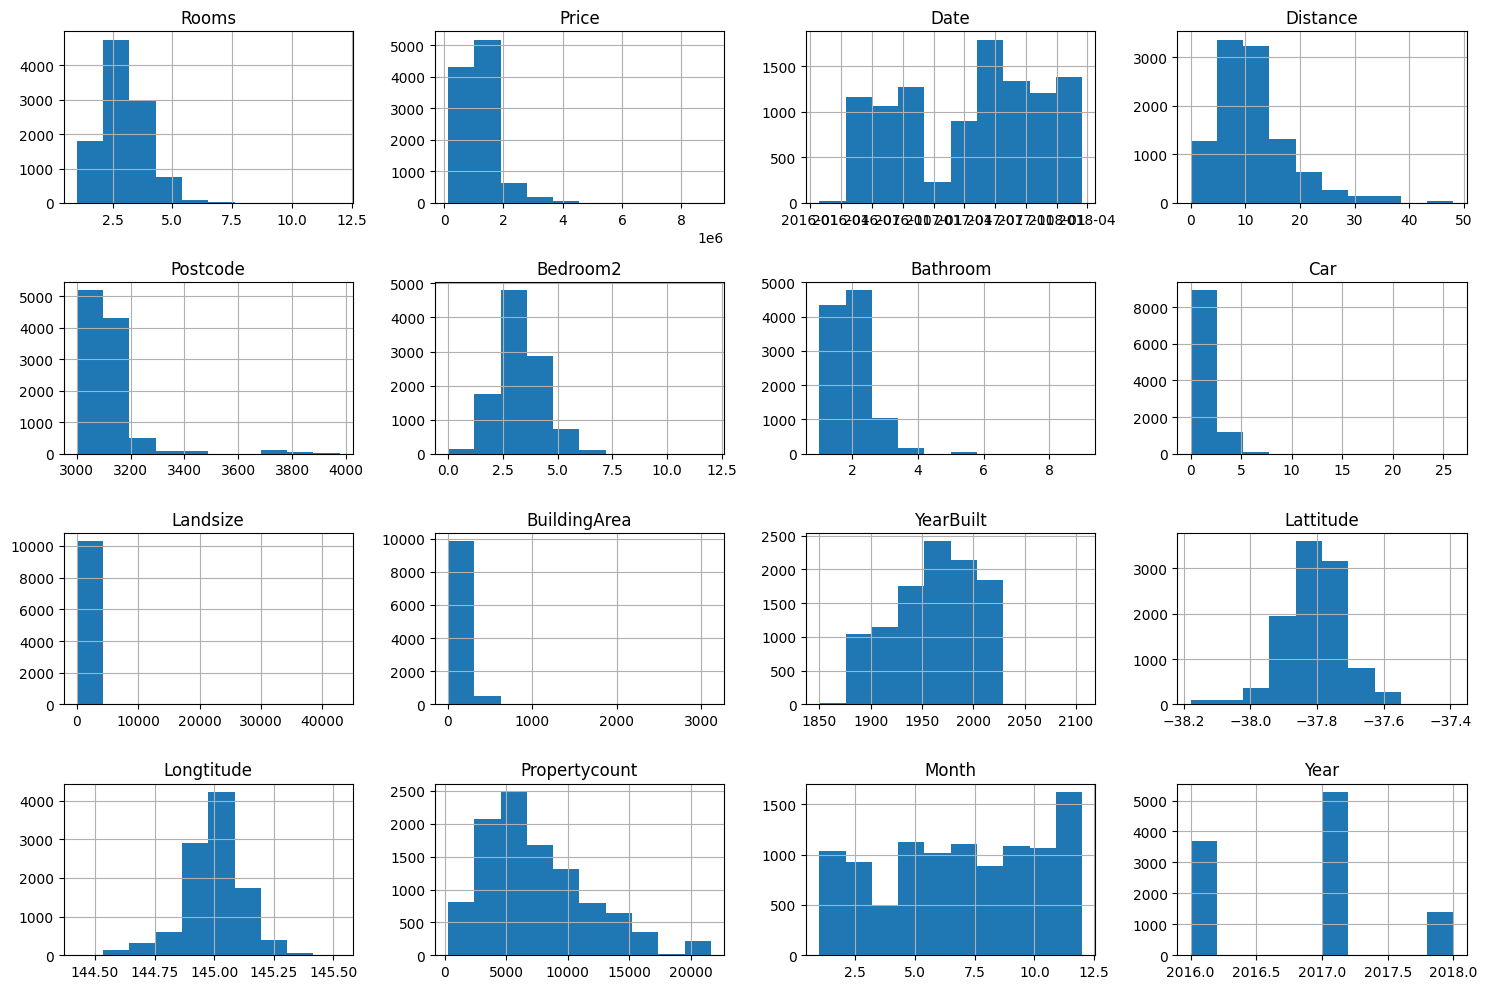

In [28]:
# Criar histogramas para colunas numéricas
dataset.hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()

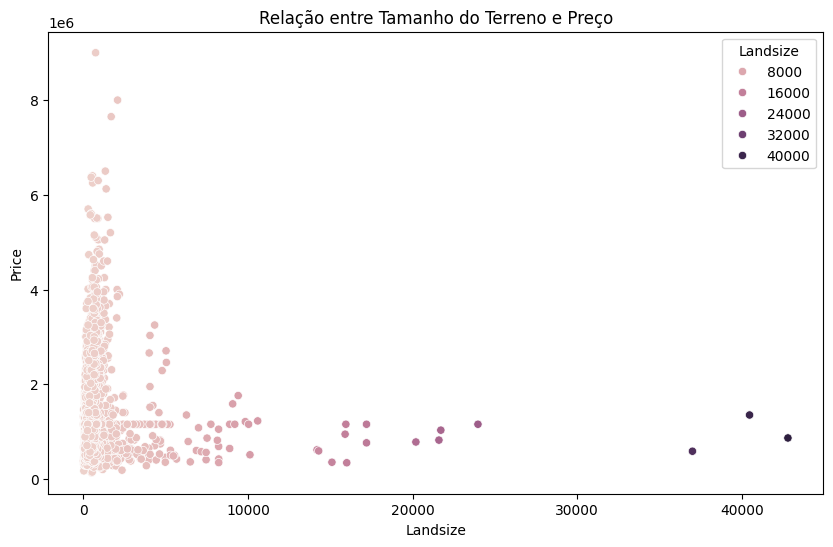

In [29]:
# Scatter plot para visualizar a relação entre Preço e Tamanho do Terreno (Landsize)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Landsize', y='Price', data=dataset, hue='Landsize')
plt.title('Relação entre Tamanho do Terreno e Preço')
plt.show()

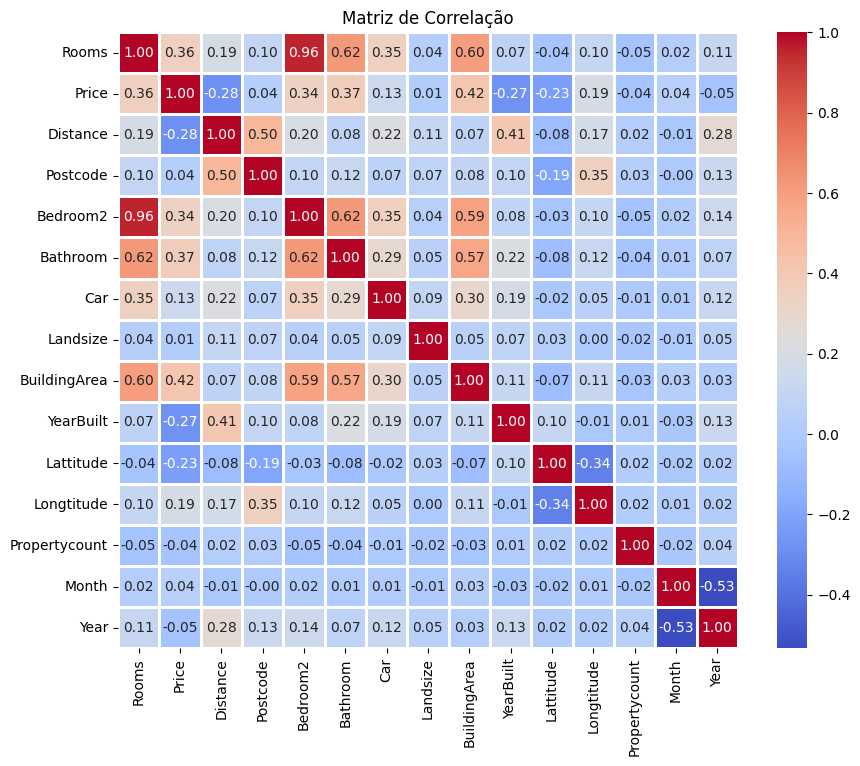

In [30]:
# Calcular a matriz de correlação para colunas numéricas
numeric_df = dataset.select_dtypes(include='number')
# Calcular a matriz de correlação
correlation_matrix = numeric_df.corr()
#print(correlation_matrix)

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Matriz de Correlação')
plt.show()

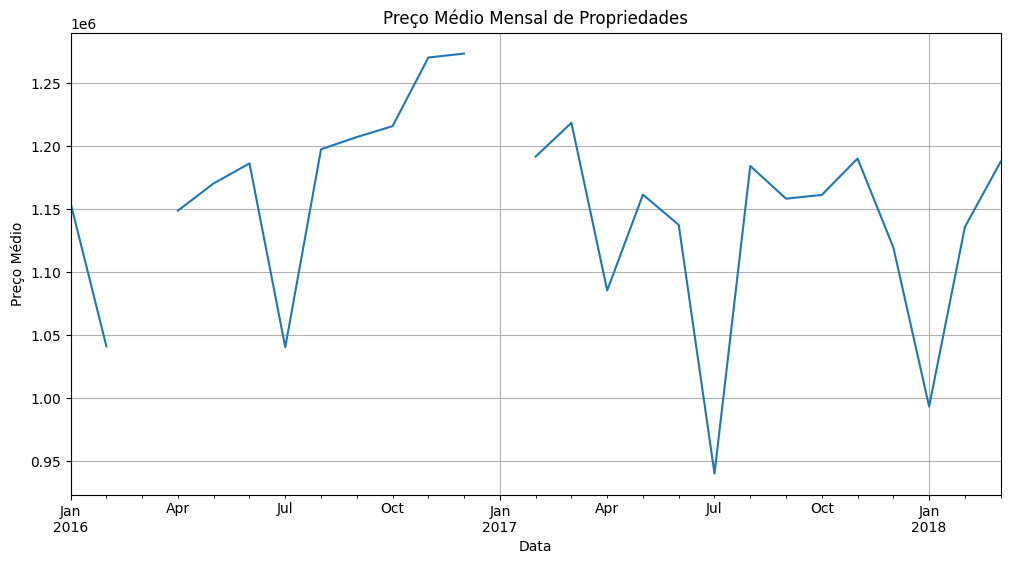

In [31]:
# 5. Visualização de Preços ao Longo do Tempo
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace=True)

monthly_prices = dataset.resample('ME')['Price'].mean()
plt.figure(figsize=(12, 6))
monthly_prices.plot()
plt.title('Preço Médio Mensal de Propriedades')
plt.xlabel('Data')
plt.ylabel('Preço Médio')
plt.grid()
plt.show()

In [32]:
# verificação de dados faltantes
dataset.isnull().sum().sort_values(ascending=False)

Car              173
Lattitude          7
Longtitude         7
Type               0
Suburb             0
Address            0
Rooms              0
SellerG            0
Method             0
Price              0
Distance           0
Bathroom           0
Landsize           0
Bedroom2           0
Postcode           0
YearBuilt          0
BuildingArea       0
CouncilArea        0
Regionname         0
Propertycount      0
Month              0
Year               0
Season             0
dtype: int64

In [33]:
#graph = px.treemap(dataset, path=['Regionname', 'YearBuilt'])
#graph.show()

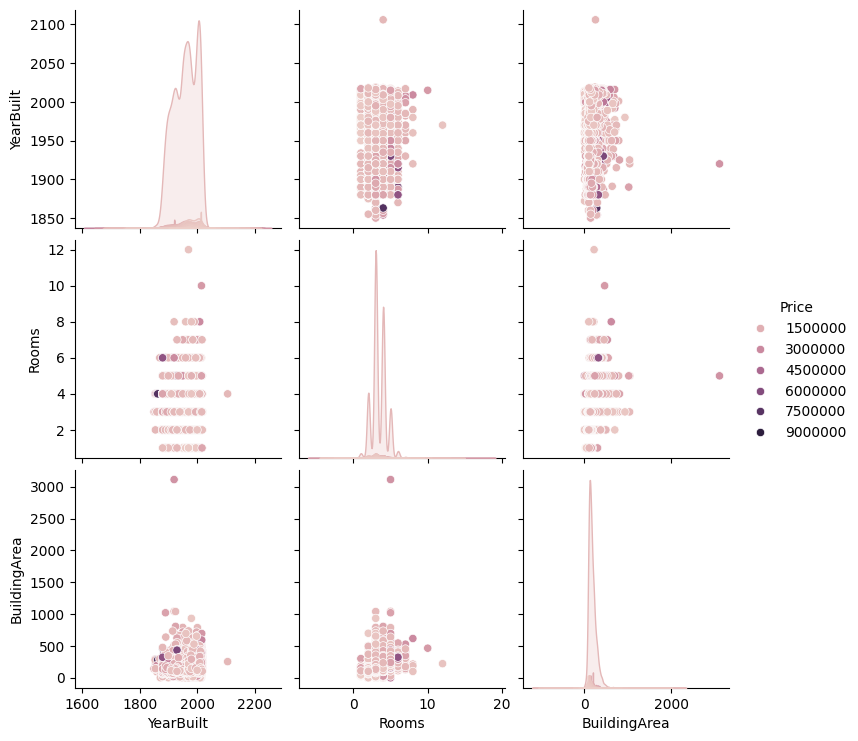

In [34]:
sns.pairplot(dataset[['Price', 'YearBuilt', 'Rooms', 'BuildingArea']], hue='Price')

In [35]:
# Remover entradas com valores de preço negativos ou faltantes
data = dataset[dataset['Price'] > 0]

In [36]:
# Filtrar os dados para Northcote
northcote_data = data[data['Suburb'] == 'Northcote']

# Contar a quantidade de vendas
sales_count = northcote_data.nunique()
print(f'Quantidade de vendas em Northcote: {sales_count}')


Quantidade de vendas em Northcote: Suburb             1
Address          116
Rooms              5
Type               3
Price             82
Method             7
SellerG           12
Distance           2
Postcode           1
Bedroom2           5
Bathroom           3
Car                4
Landsize         104
BuildingArea      70
YearBuilt         35
CouncilArea        1
Lattitude         99
Longtitude       103
Regionname         1
Propertycount      1
Month             12
Year               3
Season             4
dtype: int64


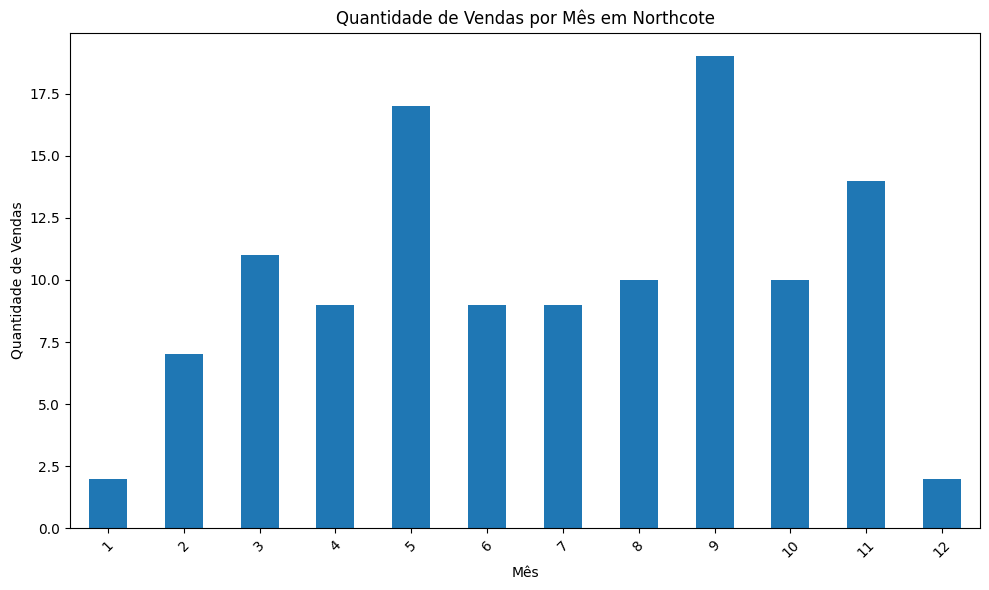

In [37]:
# Agrupar por mês para visualização
#northcote_data['Date'] = pd.to_datetime(northcote_data['Date'])
#northcote_data['Month'] = northcote_data['Date'].dt.to_period('M')

monthly_sales_count = northcote_data['Month'].value_counts().sort_index()
# Criar gráfico de barras
plt.figure(figsize=(10, 6))
monthly_sales_count.plot(kind='bar')
plt.title('Quantidade de Vendas por Mês em Northcote')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Quantidade de vendas em Northcote por mês/ano:
    Year  Month  Sales
0   2016      4      5
1   2016      5     12
2   2016      6      9
3   2016      7      5
4   2016      8      9
5   2016      9     13
6   2016     10      4
7   2016     11      9
8   2016     12      2
9   2017      3      3
10  2017      4      4
11  2017      5      5
12  2017      7      4
13  2017      8      1
14  2017      9      6
15  2017     10      6
16  2017     11      5
17  2018      1      2
18  2018      2      7
19  2018      3      8


C:\Users\Matheus\AppData\Local\Temp\ipykernel_14112\1190811787.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YearMonth', y='Sales', data=monthly_sales_count, palette='viridis')


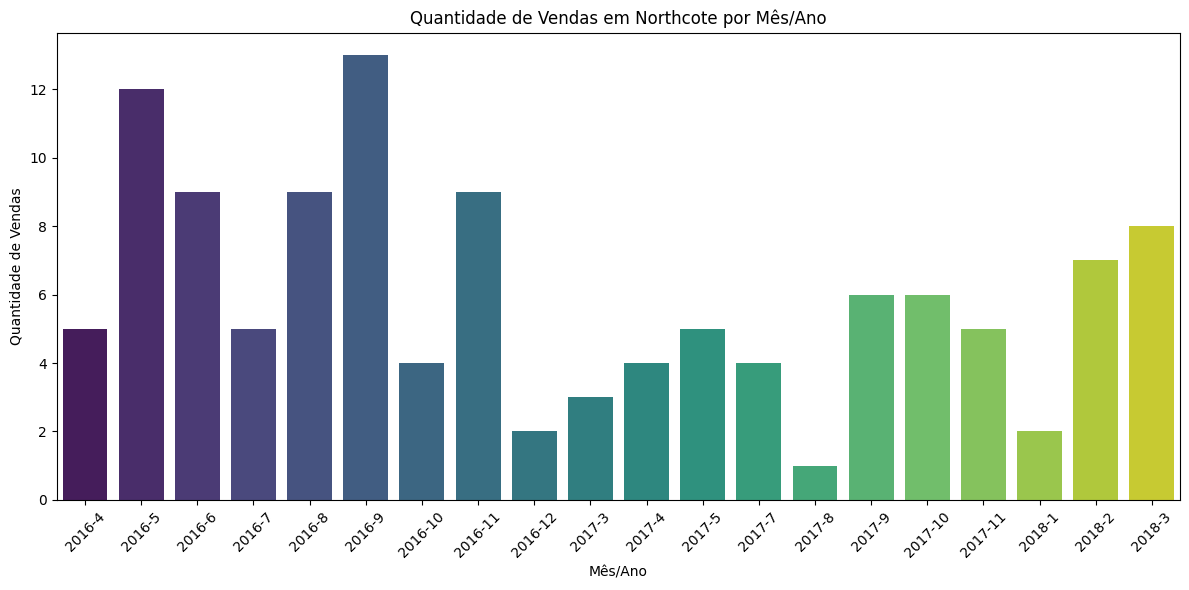

In [38]:
# Contar a quantidade de vendas por mês/ano
monthly_sales_count = northcote_data.groupby(['Year', 'Month']).size().reset_index(name='Sales')

# Exibir a quantidade de vendas
print("Quantidade de vendas em Northcote por mês/ano:")
print(monthly_sales_count)


# Criar uma coluna para combinar ano e mês para o eixo x
monthly_sales_count['YearMonth'] = monthly_sales_count['Year'].astype(str) + '-' + monthly_sales_count['Month'].astype(str)

# Plotar gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='YearMonth', y='Sales', data=monthly_sales_count, palette='viridis')
plt.xticks(rotation=45)
plt.title('Quantidade de Vendas em Northcote por Mês/Ano')
plt.xlabel('Mês/Ano')
plt.ylabel('Quantidade de Vendas')
plt.tight_layout()
plt.show()

In [39]:
# verificação de dados faltantes
dataset.isnull().sum().sort_values(ascending=False)

Car              173
Lattitude          7
Longtitude         7
Type               0
Suburb             0
Address            0
Rooms              0
SellerG            0
Method             0
Price              0
Distance           0
Bathroom           0
Landsize           0
Bedroom2           0
Postcode           0
YearBuilt          0
BuildingArea       0
CouncilArea        0
Regionname         0
Propertycount      0
Month              0
Year               0
Season             0
dtype: int64

In [40]:
# retorna todas as colunas do dataframe
dataset.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Month', 'Year', 'Season'],
      dtype='object')

In [41]:
# 6. Separando previsores e classe
X = dataset[['BuildingArea', 'Bathroom', 'Suburb', 'Bedroom2', 'Rooms']]
y = dataset['Price']

In [42]:
# Codificando variáveis categóricas | Converta variáveis categóricas em variáveis dummy (one-hot encoding)
#X = pd.get_dummies(X, columns=['Suburb', 'Type', 'Method', 'SellerG', 'Postcode', 'CouncilArea', 'Regionname'], drop_first=True)

In [43]:
# Normalização e Padronização
label_encoder = LabelEncoder()

#transforma suburb em valor numerico
X['Suburb'] = label_encoder.fit_transform(X['Suburb'])
X['Regionname'] = label_encoder.fit_transform(X['Suburb'])


scaler = StandardScaler()
X[['BuildingArea', 'Bathroom', 'Suburb', 'Bedroom2', 'Rooms', 'Regionname']] = scaler.fit_transform(X[['BuildingArea', 'Bathroom', 'Suburb', 'Bedroom2', 'Rooms', 'Regionname']])

C:\Users\Matheus\AppData\Local\Temp\ipykernel_14112\3306232197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Suburb'] = label_encoder.fit_transform(X['Suburb'])
C:\Users\Matheus\AppData\Local\Temp\ipykernel_14112\3306232197.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Regionname'] = label_encoder.fit_transform(X['Suburb'])
C:\Users\Matheus\AppData\Local\Temp\ipykernel_14112\3306232197.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

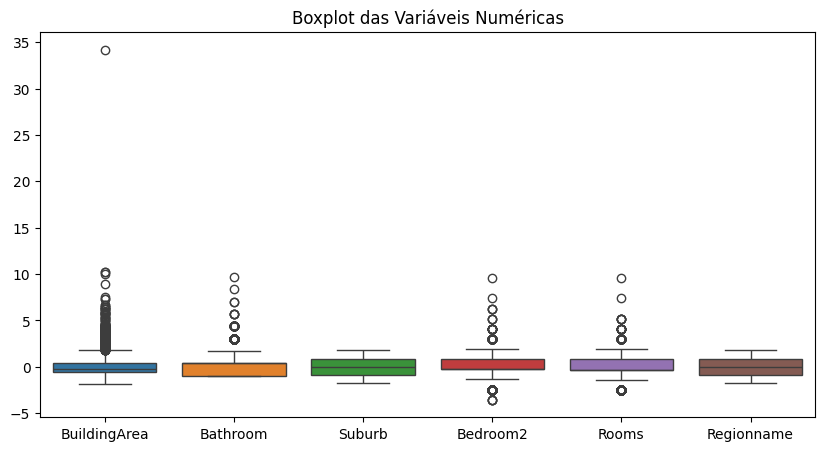

In [44]:
#grafico para conferir se ha outliers nas variaveis
plt.figure(figsize=(10, 5))
sns.boxplot(data=X)
plt.title('Boxplot das Variáveis Numéricas')
plt.show()

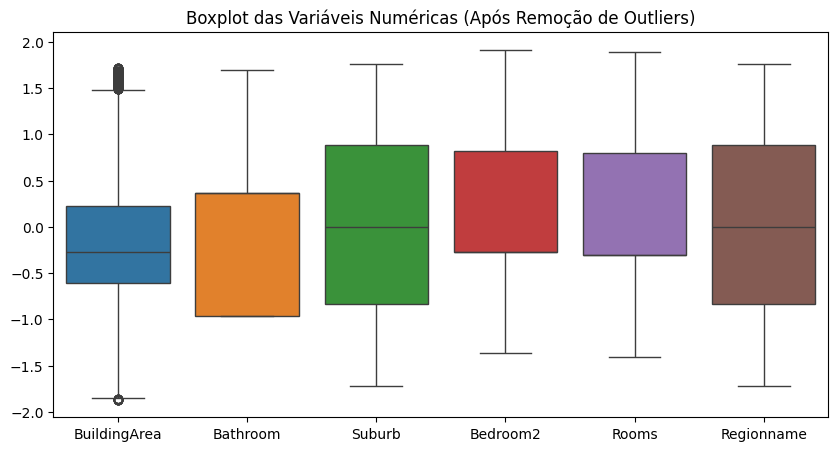

In [45]:
#função para remover outliers
def remove_outliers(X, column):
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return X[(X[column] >= lower_bound) & (X[column] <= upper_bound)]

X_clean = X.copy()

X_clean = remove_outliers(X_clean, 'Rooms')
X_clean = remove_outliers(X_clean, 'Bathroom')
X_clean = remove_outliers(X_clean, 'BuildingArea')
X_clean = remove_outliers(X_clean, 'Suburb')
X_clean = remove_outliers(X_clean, 'Bedroom2')
X_clean = remove_outliers(X_clean, 'Regionname')

plt.figure(figsize=(10, 5))
sns.boxplot(data=X_clean)
plt.title('Boxplot das Variáveis Numéricas (Após Remoção de Outliers)')
plt.show()

In [46]:
# 7. Dividir entre conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamanho do conjunto de treinamento:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


# Converter colunas categóricas em variáveis numéricas
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_train.shape, y_train.shape

# Garantir que X_train e X_test tenham o mesmo número de colunas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

#print(X_train.shape)  # Deve ser (n_samples, n_features)
#print(y_train.shape)  # Deve ser (n_samples,)

#print(X_train.isnull().sum())  # Verifica se há NaN nas variáveis preditoras
#print(y_train.isnull().sum())   # Verifica se há NaN na variável alvo

Tamanho do conjunto de treinamento: (8298, 6)
Tamanho do conjunto de teste: (2075, 6)


In [47]:
# Inicializar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
#model = LinearRegression()

print(X_train.dtypes)


BuildingArea    float64
Bathroom        float64
Suburb          float64
Bedroom2        float64
Rooms           float64
Regionname      float64
dtype: object


In [48]:
# Treinar o modelo
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [50]:
# Calcular RMSE e R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 477972.821161129
R²: 0.3112184742449786


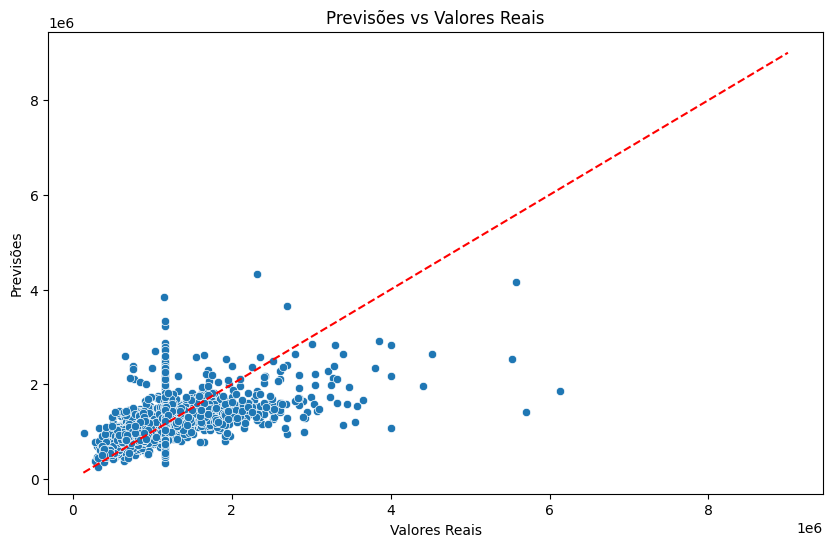

In [51]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs Valores Reais')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Linha de referência
plt.show()

In [52]:
# depois de treinar o modelo de classificação, realizamos as predições dos dados de teste
predicted = model.predict(X_test)
predicted

array([1247927.10745448,  944969.4687587 ,  827090.17909079, ...,
        894154.19634246,  837201.58059086, 1109145.23281803])

In [53]:
predicted_prices = model.predict(X)
data['Predicted Price'] = predicted_prices
data['Price Change (%)'] = data['Predicted Price'].pct_change() * 100
data['Drop'] = data['Price Change (%)'] < -5

In [54]:
price_drops = data[data['Price Change (%)'] < -5]  # Queda de 5% ou mais
print(price_drops[['Month', 'Year', 'Price Change (%)']])

            Month  Year  Price Change (%)
Date                                     
2016-11-07     11  2016        -36.537170
2016-10-08     10  2016        -29.187560
2016-10-15     10  2016         -8.323975
2016-09-17      9  2016        -48.950242
2017-03-18      3  2017         -7.607035
...           ...   ...               ...
2018-02-24      2  2018        -35.956592
2018-02-24      2  2018        -51.981164
2018-02-24      2  2018         -7.130639
2018-02-24      2  2018         -6.239272
2018-02-24      2  2018        -25.229195

[4574 rows x 3 columns]


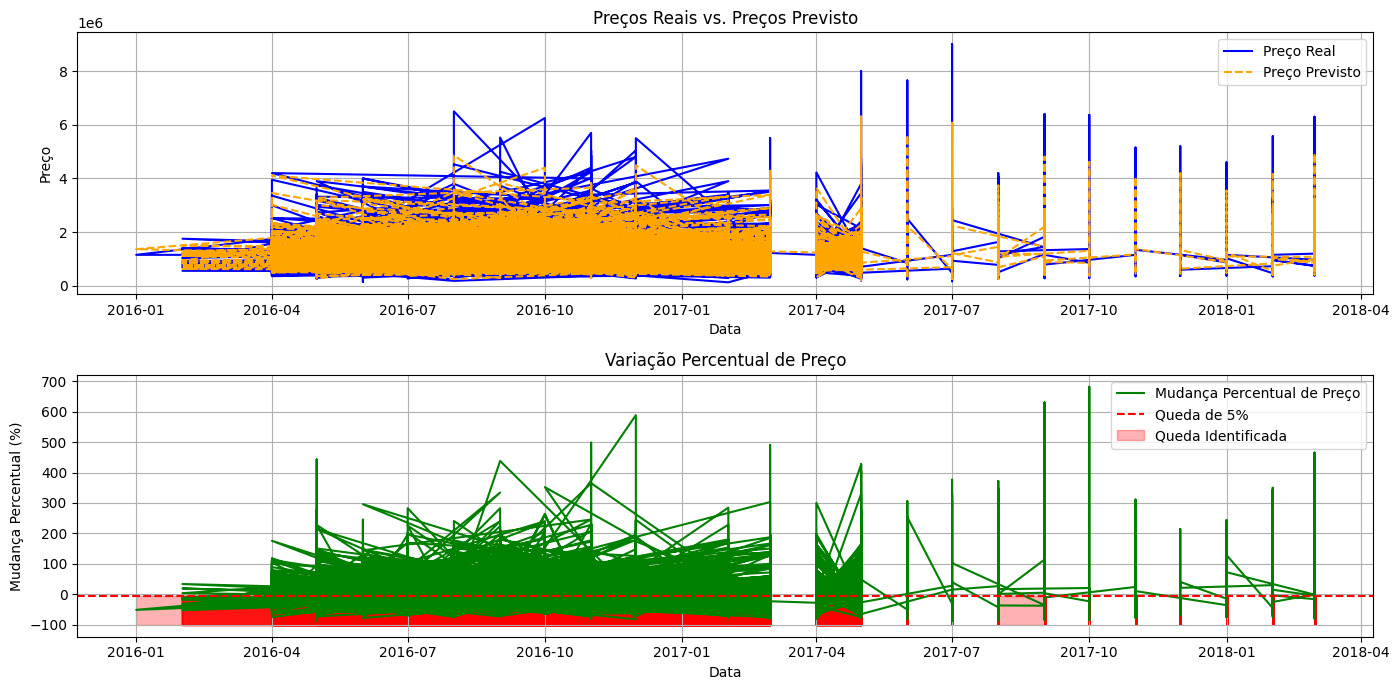

In [55]:
# Criar uma coluna de Data para plotagem
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Criar gráficos
plt.figure(figsize=(14, 7))

# Gráfico de preços reais vs. previstos
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Price'], label='Preço Real', color='blue')
plt.plot(data['Date'], data['Predicted Price'], label='Preço Previsto', color='orange', linestyle='--')
plt.title('Preços Reais vs. Preços Previsto')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid()

# Gráfico de variação percentual
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Price Change (%)'], label='Mudança Percentual de Preço', color='green')
plt.axhline(y=-5, color='red', linestyle='--', label='Queda de 5%')
plt.fill_between(data['Date'], -100, -5, where=data['Drop'], color='red', alpha=0.3, label='Queda Identificada')
plt.title('Variação Percentual de Preço')
plt.xlabel('Data')
plt.ylabel('Mudança Percentual (%)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [56]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predicted)
print("Mean Squared Error:", mse)

Mean Squared Error: 228458017768.7286


In [57]:
#from sklearn.metrics import accuracy_score

# depois, realizamos a comparação dos dados da previsão com os dados reais de teste
#accuracy = accuracy_score(predicted, y_test)
#accuracy

In [58]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predicted)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 319819.4332894824


In [59]:
import numpy as np

# Previsão com o modelo simples
y_mean = np.mean(y_test)
baseline_predictions = [y_mean] * len(y_test)

# Avaliar a performance do modelo baseline
baseline_mse = mean_squared_error(y_test, baseline_predictions)
print("Baseline MSE:", baseline_mse)

# Comparar com o MSE do seu modelo
model_mse = mean_squared_error(y_test, predicted)
print("Model MSE:", model_mse)

Baseline MSE: 331684299340.49097
Model MSE: 228458017768.7286


In [60]:
import pickle
import os

file_path = os.path.join('models', 'final_classification_model_melbourne.pkl')
pickle.dump(model, open(file_path, 'wb'))

In [ ]:
unique_values = sorted(dataset['Regionname'].unique())

mapping = {value: index for index, value in enumerate(unique_values)}
print(mapping)

{'Eastern Metropolitan': 0, 'Eastern Victoria': 1, 'Northern Metropolitan': 2, 'Northern Victoria': 3, 'South-Eastern Metropolitan': 4, 'Southern Metropolitan': 5, 'Western Metropolitan': 6, 'Western Victoria': 7}
